# Geometry and Transforms in Image Processing

Welcome to this comprehensive tutorial on geometric transformations in image processing! Geometric transforms allow us to manipulate the spatial arrangement of pixels in an image. This is fundamental for tasks like image alignment, object detection, augmentation, and many computer vision applications.

**What we'll cover:**
- **Resizing**: Changing image dimensions
- **Rotation**: Rotating images around a point
- **Affine Transforms**: Preserving parallel lines (translation, rotation, scaling, shearing)
- **Perspective Transforms**: Correcting for 3D perspective (warping)
- **Image Pyramids**: Multi-scale representations

Each section builds progressively - we'll start with simple 2D operations and move to more complex transformations that account for 3D geometry.

**Prerequisites:** Basic understanding of NumPy arrays, OpenCV, and matplotlib.

Let's dive in!

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['image.cmap'] = 'gray'

## 1. Image Resizing

**What is resizing?**
Resizing changes the spatial resolution of an image by either shrinking or enlarging it. This is one of the most fundamental geometric operations.

**When to use:**
- Preparing images for neural network input (standardizing sizes)
- Reducing storage space
- Improving computational efficiency
- Creating thumbnails

**Key concepts:**
- **Interpolation**: Method used to estimate pixel values when enlarging
- **Aspect ratio**: Width/height relationship to maintain
- **Scaling factors**: How much to scale in x and y directions

In [2]:
# Load a sample image for demonstration
img = cv2.imread('datasets/sample_images/sample1.png')
if img is None:
    print("Error: Could not load image. Please check the path.")
else:
    print(f"Original image shape: {img.shape}")
    
# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Original image shape: (384, 512, 3)


### Resizing Examples

Let's explore different resizing techniques:

In [3]:
# Example 1: Basic resizing to specific dimensions
height, width = img.shape[:2]
new_width, new_height = 300, 200

# Using cv2.resize with default interpolation (bilinear)
resized_basic = cv2.resize(img, (new_width, new_height))
resized_basic_rgb = cv2.cvtColor(resized_basic, cv2.COLOR_BGR2RGB)

print(f"Resized to: {resized_basic.shape}")

Resized to: (200, 300, 3)


In [4]:
# Example 2: Scaling by factors
scale_x, scale_y = 0.5, 0.5  # Scale to half size
resized_scaled = cv2.resize(img, None, fx=scale_x, fy=scale_y)
resized_scaled_rgb = cv2.cvtColor(resized_scaled, cv2.COLOR_BGR2RGB)

print(f"Scaled image shape: {resized_scaled.shape}")

Scaled image shape: (192, 256, 3)


In [5]:
# Example 3: Different interpolation methods
# For shrinking (reducing size), use INTER_AREA
resized_area = cv2.resize(img, (200, 150), interpolation=cv2.INTER_AREA)
resized_area_rgb = cv2.cvtColor(resized_area, cv2.COLOR_BGR2RGB)

# For enlarging, use INTER_CUBIC or INTER_LINEAR
resized_cubic = cv2.resize(img, (600, 450), interpolation=cv2.INTER_CUBIC)
resized_cubic_rgb = cv2.cvtColor(resized_cubic, cv2.COLOR_BGR2RGB)

print(f"Area interpolation shape: {resized_area.shape}")
print(f"Cubic interpolation shape: {resized_cubic.shape}")

Area interpolation shape: (150, 200, 3)
Cubic interpolation shape: (450, 600, 3)


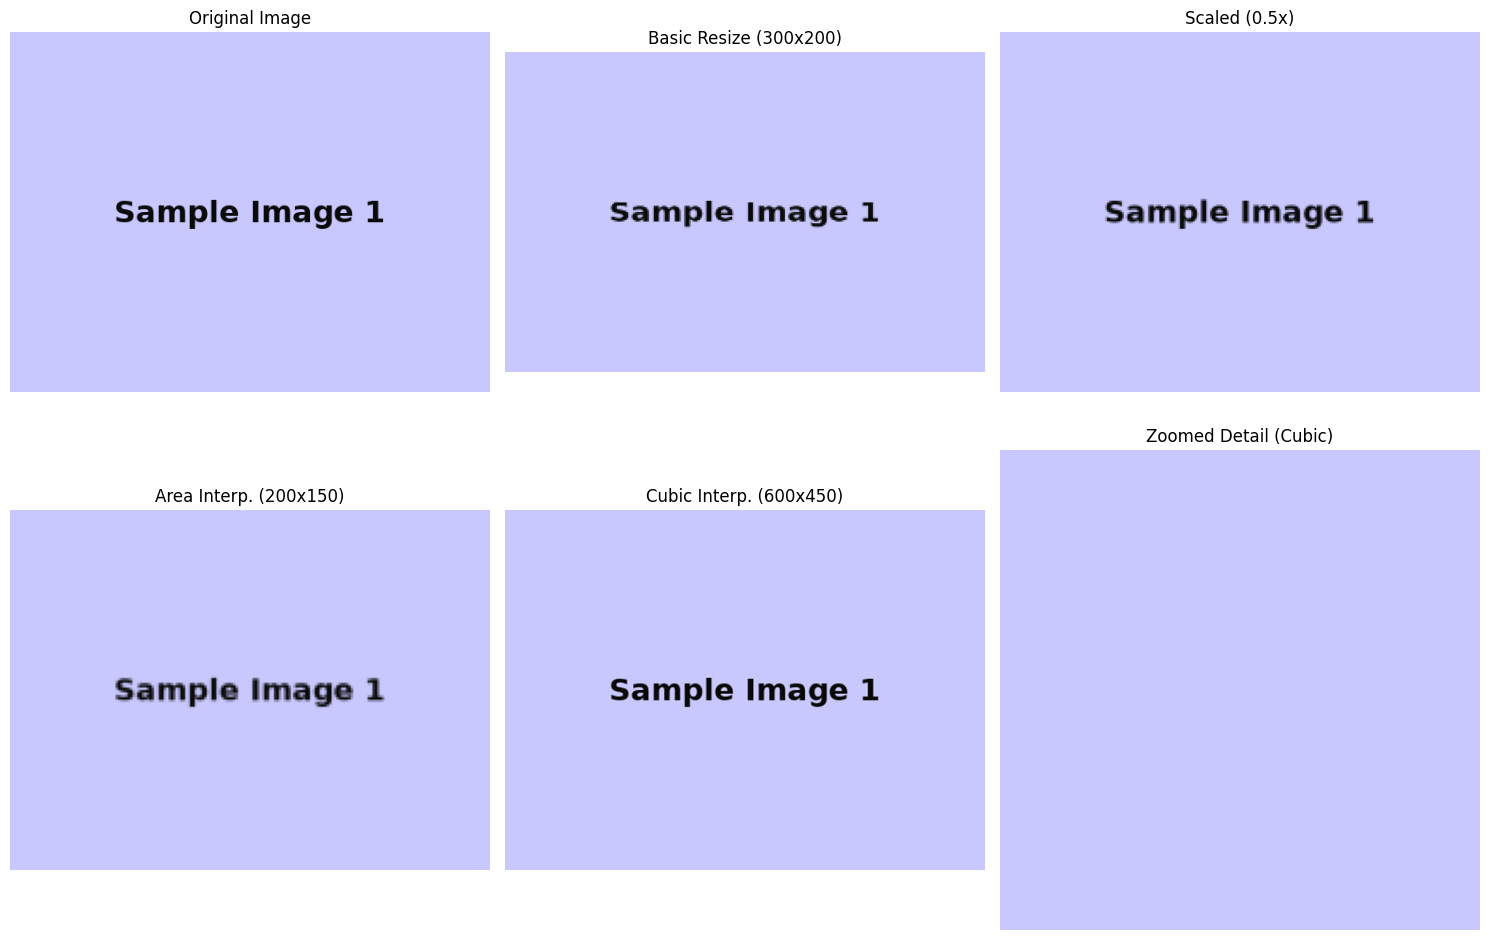

In [6]:
# Visual comparison of resizing methods
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0,0].imshow(img_rgb)
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

# Basic resize
axes[0,1].imshow(resized_basic_rgb)
axes[0,1].set_title('Basic Resize (300x200)')
axes[0,1].axis('off')

# Scaled
axes[0,2].imshow(resized_scaled_rgb)
axes[0,2].set_title('Scaled (0.5x)')
axes[0,2].axis('off')

# Area interpolation
axes[1,0].imshow(resized_area_rgb)
axes[1,0].set_title('Area Interp. (200x150)')
axes[1,0].axis('off')

# Cubic interpolation
axes[1,1].imshow(resized_cubic_rgb)
axes[1,1].set_title('Cubic Interp. (600x450)')
axes[1,1].axis('off')

# Zoom on cubic for detail
axes[1,2].imshow(resized_cubic_rgb[100:200, 200:300])
axes[1,2].set_title('Zoomed Detail (Cubic)')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

**Tips for Resizing:**
- Use `cv2.INTER_AREA` for shrinking (better quality)
- Use `cv2.INTER_CUBIC` for enlarging (slower but higher quality)
- `cv2.INTER_LINEAR` is a good default for most cases
- Always check aspect ratio preservation if needed
- Consider memory implications when enlarging images

## 2. Image Rotation

**What is rotation?**
Rotation transforms an image by turning it around a center point by a specified angle.

**Key concepts:**
- **Center of rotation**: Usually image center, but can be any point
- **Rotation matrix**: Mathematical transformation matrix
- **Bounding box**: New image dimensions after rotation

**Applications:**
- Correcting skewed documents
- Data augmentation for machine learning
- Aligning images for stitching

In [7]:
# Example 1: Basic rotation around center
height, width = img.shape[:2]
center = (width // 2, height // 2)
angle = 45  # degrees

# Get rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Apply rotation
rotated = cv2.warpAffine(img, rotation_matrix, (width, height))
rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)

print(f"Rotation matrix:\n{rotation_matrix}")

Rotation matrix:
[[  0.70710678   0.70710678 -60.78383797]
 [ -0.70710678   0.70710678 237.254834  ]]


In [8]:
# Example 2: Rotation with different centers and scaling
# Rotate around top-left corner
center_tl = (0, 0)
rotation_matrix_tl = cv2.getRotationMatrix2D(center_tl, 30, 1.0)
rotated_tl = cv2.warpAffine(img, rotation_matrix_tl, (width, height))
rotated_tl_rgb = cv2.cvtColor(rotated_tl, cv2.COLOR_BGR2RGB)

# Rotate with scaling
rotation_matrix_scaled = cv2.getRotationMatrix2D(center, -60, 0.7)
rotated_scaled = cv2.warpAffine(img, rotation_matrix_scaled, (width, height))
rotated_scaled_rgb = cv2.cvtColor(rotated_scaled, cv2.COLOR_BGR2RGB)

In [9]:
# Example 3: Automatic bounding box calculation
# Calculate new dimensions to fit entire rotated image
cos = np.abs(rotation_matrix[0, 0])
sin = np.abs(rotation_matrix[0, 1])

new_width_calc = int((height * sin) + (width * cos))
new_height_calc = int((height * cos) + (width * sin))

# Adjust rotation matrix for new center
rotation_matrix[0, 2] += (new_width_calc / 2) - center[0]
rotation_matrix[1, 2] += (new_height_calc / 2) - center[1]

rotated_fitted = cv2.warpAffine(img, rotation_matrix, (new_width_calc, new_height_calc))
rotated_fitted_rgb = cv2.cvtColor(rotated_fitted, cv2.COLOR_BGR2RGB)

print(f"Fitted dimensions: {rotated_fitted.shape}")

Fitted dimensions: (633, 633, 3)


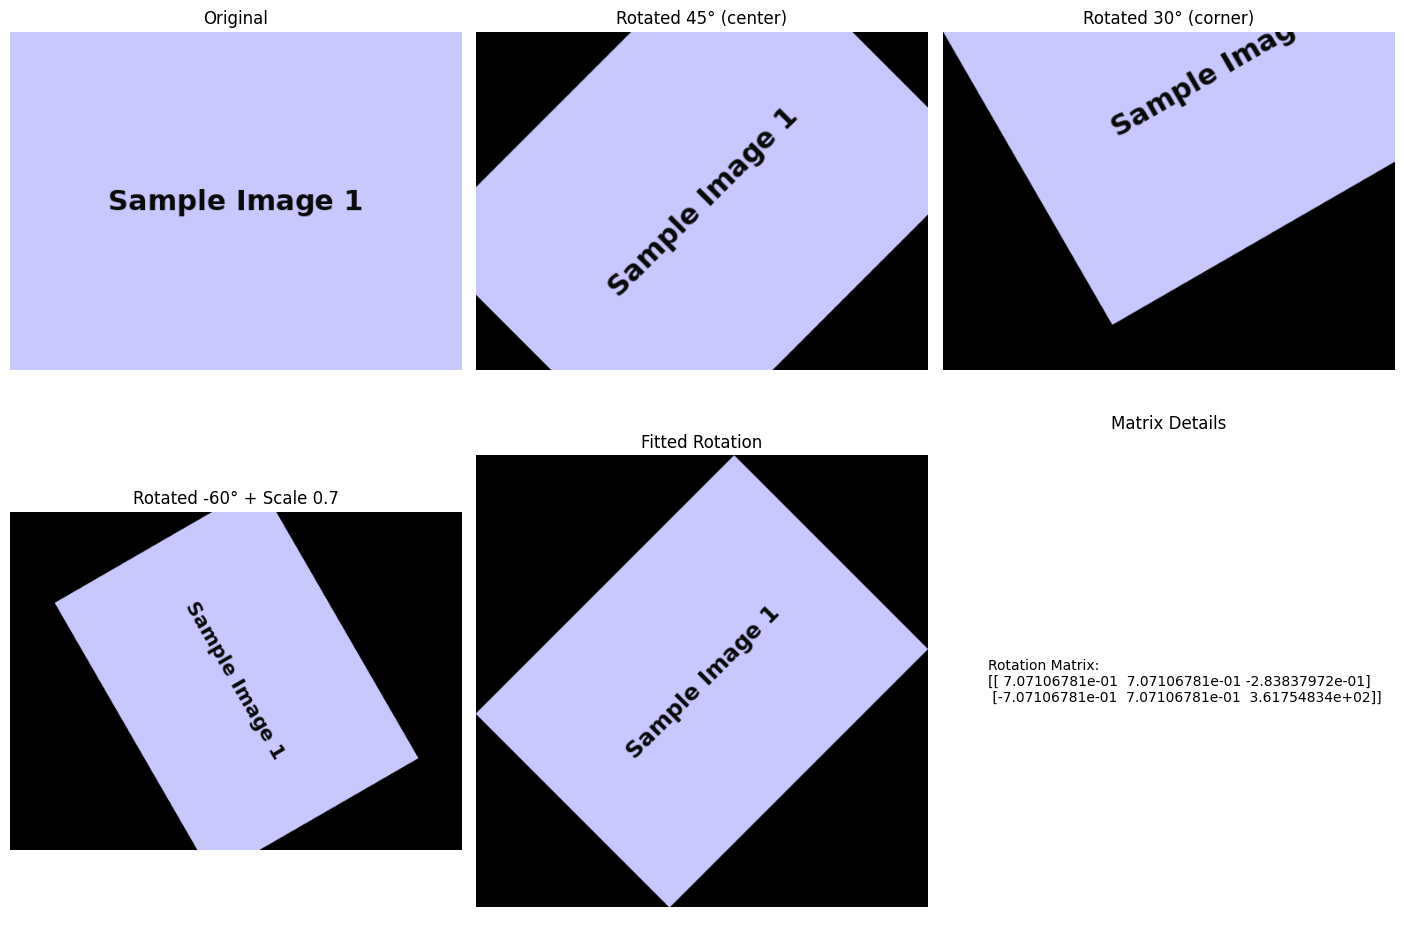

In [10]:
# Visual comparison of rotations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title('Original')
axes[0,0].axis('off')

axes[0,1].imshow(rotated_rgb)
axes[0,1].set_title('Rotated 45° (center)')
axes[0,1].axis('off')

axes[0,2].imshow(rotated_tl_rgb)
axes[0,2].set_title('Rotated 30° (corner)')
axes[0,2].axis('off')

axes[1,0].imshow(rotated_scaled_rgb)
axes[1,0].set_title('Rotated -60° + Scale 0.7')
axes[1,0].axis('off')

axes[1,1].imshow(rotated_fitted_rgb)
axes[1,1].set_title('Fitted Rotation')
axes[1,1].axis('off')

# Show rotation matrix effect
axes[1,2].text(0.1, 0.5, f'Rotation Matrix:\n{rotation_matrix}', 
               transform=axes[1,2].transAxes, fontsize=10, verticalalignment='center')
axes[1,2].set_title('Matrix Details')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

**Rotation Tips:**
- Negative angles rotate clockwise
- Use `cv2.warpAffine` for rotation
- Calculate bounding box to avoid cropping
- Rotation is an affine transform (preserves parallel lines)
- Consider interpolation quality for smooth results

## 3. Affine Transforms

**What are affine transforms?**
Affine transformations preserve parallel lines and ratios of distances. They include:
- Translation (shifting)
- Rotation
- Scaling
- Shearing (skewing)
- Combinations of above

**Mathematical representation:**
Any affine transform can be represented by a 2x3 matrix:
```
[a11 a12 b1]
[a21 a22 b2]
```

**Applications:**
- Image registration and alignment
- Perspective correction for small angles
- Data augmentation
- Geometric normalization

In [11]:
# Example 1: Translation (shifting)
tx, ty = 100, 50  # Shift right by 100, down by 50
translation_matrix = np.float32([[1, 0, tx],
                                [0, 1, ty]])

translated = cv2.warpAffine(img, translation_matrix, (width + tx, height + ty))
translated_rgb = cv2.cvtColor(translated, cv2.COLOR_BGR2RGB)

print(f"Translation matrix:\n{translation_matrix}")

Translation matrix:
[[  1.   0. 100.]
 [  0.   1.  50.]]


In [12]:
# Example 2: Shearing (skewing)
# Horizontal shear
shear_x = 0.3
shear_matrix_x = np.float32([[1, shear_x, 0],
                            [0, 1, 0]])

sheared_x = cv2.warpAffine(img, shear_matrix_x, (int(width + height*shear_x), height))
sheared_x_rgb = cv2.cvtColor(sheared_x, cv2.COLOR_BGR2RGB)

# Vertical shear
shear_y = 0.2
shear_matrix_y = np.float32([[1, 0, 0],
                            [shear_y, 1, 0]])

sheared_y = cv2.warpAffine(img, shear_matrix_y, (width, int(height + width*shear_y)))
sheared_y_rgb = cv2.cvtColor(sheared_y, cv2.COLOR_BGR2RGB)

In [13]:
# Example 3: Complex affine transform (rotation + translation + scaling)
# Define three points in source image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Define where these points should map to in destination
pts2 = np.float32([[100, 100], [250, 80], [80, 250]])

# Get affine transform matrix
affine_matrix = cv2.getAffineTransform(pts1, pts2)

# Apply transform
affine_transformed = cv2.warpAffine(img, affine_matrix, (width, height))
affine_transformed_rgb = cv2.cvtColor(affine_transformed, cv2.COLOR_BGR2RGB)

print(f"Affine matrix:\n{affine_matrix}")

Affine matrix:
[[ 1.         -0.13333333 56.66666667]
 [-0.13333333  1.         56.66666667]]


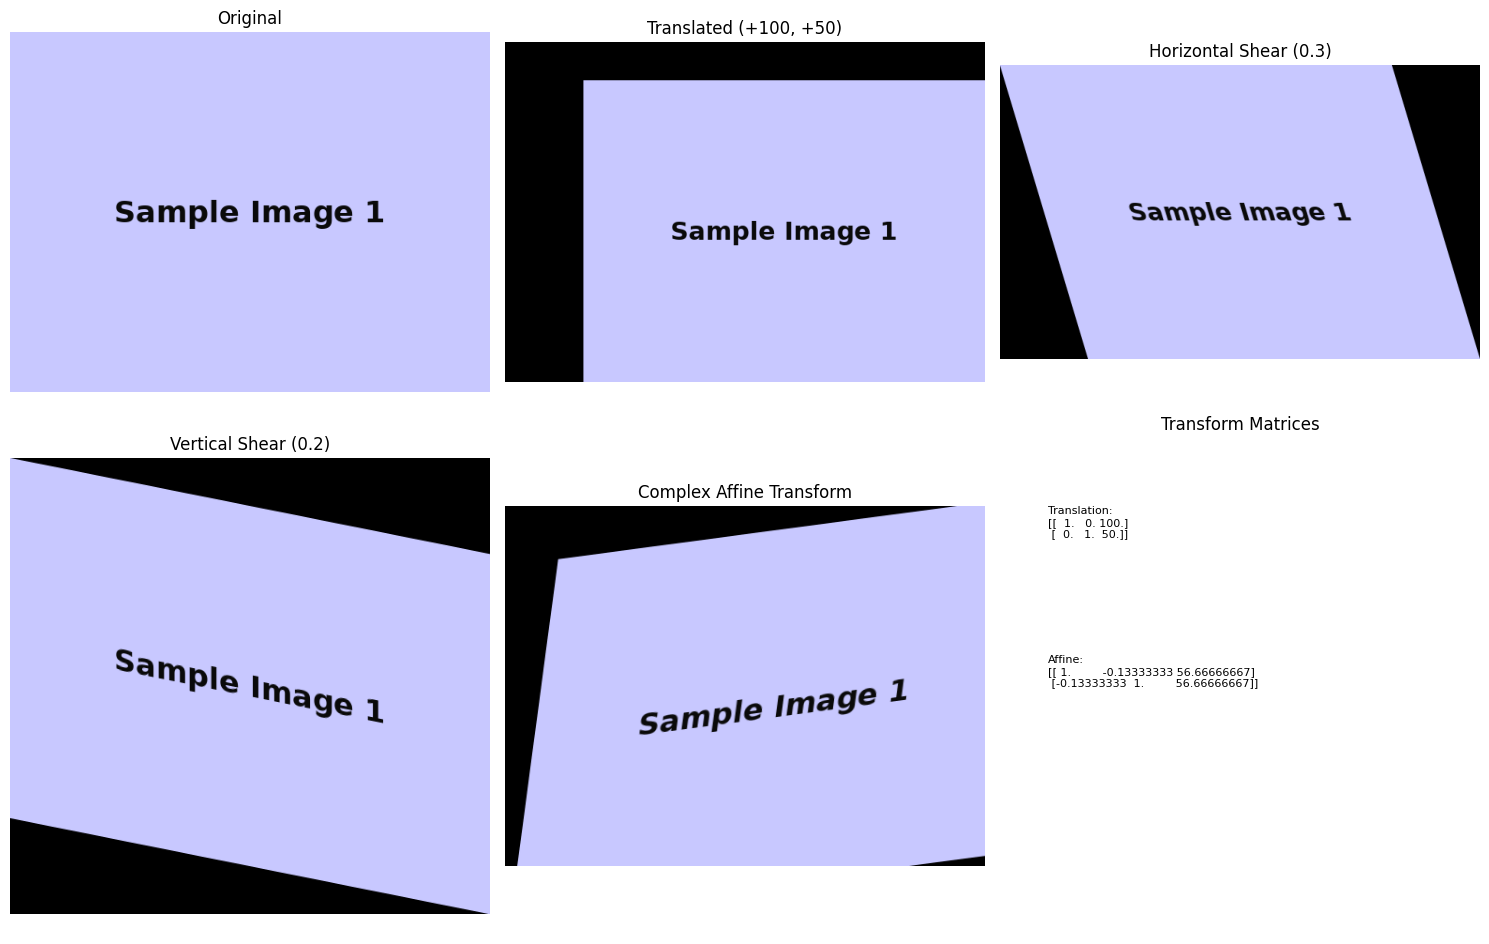

In [14]:
# Visual comparison of affine transforms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title('Original')
axes[0,0].axis('off')

axes[0,1].imshow(translated_rgb)
axes[0,1].set_title('Translated (+100, +50)')
axes[0,1].axis('off')

axes[0,2].imshow(sheared_x_rgb)
axes[0,2].set_title('Horizontal Shear (0.3)')
axes[0,2].axis('off')

axes[1,0].imshow(sheared_y_rgb)
axes[1,0].set_title('Vertical Shear (0.2)')
axes[1,0].axis('off')

axes[1,1].imshow(affine_transformed_rgb)
axes[1,1].set_title('Complex Affine Transform')
axes[1,1].axis('off')

# Show matrices
axes[1,2].text(0.1, 0.8, f'Translation:\n{translation_matrix}', fontsize=8)
axes[1,2].text(0.1, 0.5, f'Affine:\n{affine_matrix}', fontsize=8)
axes[1,2].set_title('Transform Matrices')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

**Affine Transform Tips:**
- Use `cv2.getAffineTransform()` with 3 point pairs
- All affine transforms use `cv2.warpAffine()`
- Matrix format: [[scale_x, shear_x, translate_x], [shear_y, scale_y, translate_y]]
- Useful for correcting small perspective distortions
- Preserves parallelism and ratios

## 4. Perspective Transforms

**What are perspective transforms?**
Perspective transforms account for 3D geometry and camera effects. Unlike affine transforms, they can change the apparent size and shape based on depth.

**Key differences from affine:**
- Can converge parallel lines (like railroad tracks)
- Requires 4 point correspondences
- Uses 3x3 transformation matrix

**Applications:**
- Document scanning and straightening
- Bird's eye view transformations
- Panorama stitching
- Augmented reality

In [15]:
# Load document image for perspective correction
doc_img = cv2.imread('datasets/sample_images/doc_photo.png')
if doc_img is not None:
    doc_rgb = cv2.cvtColor(doc_img, cv2.COLOR_BGR2RGB)
    print(f"Document image shape: {doc_img.shape}")
else:
    print("Document image not found, using sample image")
    doc_img = img.copy()
    doc_rgb = img_rgb.copy()

Document image shape: (384, 512, 3)


In [16]:
# Example 1: Basic perspective correction
# Define 4 points in source image (document corners)
height, width = doc_img.shape[:2]
pts1 = np.float32([[30, 30], [width-30, 50], [20, height-30], [width-20, height-20]])

# Define where these points should map to (rectangle)
pts2 = np.float32([[0, 0], [400, 0], [0, 600], [400, 600]])

# Get perspective transform matrix
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Apply transform
perspective_corrected = cv2.warpPerspective(doc_img, perspective_matrix, (400, 600))
perspective_corrected_rgb = cv2.cvtColor(perspective_corrected, cv2.COLOR_BGR2RGB)

print(f"Perspective matrix:\n{perspective_matrix}")

Perspective matrix:
[[ 8.56861942e-01  2.64463562e-02 -2.64992489e+01]
 [-8.56647875e-02  1.93602420e+00 -5.55107823e+01]
 [-7.73105040e-05  1.36799501e-04  1.00000000e+00]]


In [17]:
# Example 2: Creating perspective effect (opposite of correction)
# Define rectangle points
pts1_rect = np.float32([[0, 0], [300, 0], [0, 400], [300, 400]])

# Define trapezoid points (creating perspective)
pts2_trapezoid = np.float32([[50, 100], [250, 50], [30, 350], [280, 380]])

# Get transform matrix
perspective_effect_matrix = cv2.getPerspectiveTransform(pts1_rect, pts2_trapezoid)

# Apply transform
perspective_effect = cv2.warpPerspective(img, perspective_effect_matrix, (width, height))
perspective_effect_rgb = cv2.cvtColor(perspective_effect, cv2.COLOR_BGR2RGB)

In [18]:
# Example 3: Bird's eye view transformation
# Simulate transforming a road view to top-down
# This would typically require camera calibration
road_img = cv2.imread('datasets/sample_images/road.png')
if road_img is not None:
    road_rgb = cv2.cvtColor(road_img, cv2.COLOR_BGR2RGB)
    h, w = road_img.shape[:2]
    
    # Define source points (trapezoid representing road)
    src_points = np.float32([[w*0.4, h*0.6], [w*0.6, h*0.6], [w*0.1, h*0.9], [w*0.9, h*0.9]])
    
    # Define destination points (rectangle for bird's eye)
    dst_points = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
    
    # Get perspective matrix
    birds_eye_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    
    # Apply transform
    birds_eye = cv2.warpPerspective(road_img, birds_eye_matrix, (w, h))
    birds_eye_rgb = cv2.cvtColor(birds_eye, cv2.COLOR_BGR2RGB)
else:
    print("Road image not found")
    birds_eye_rgb = img_rgb.copy()

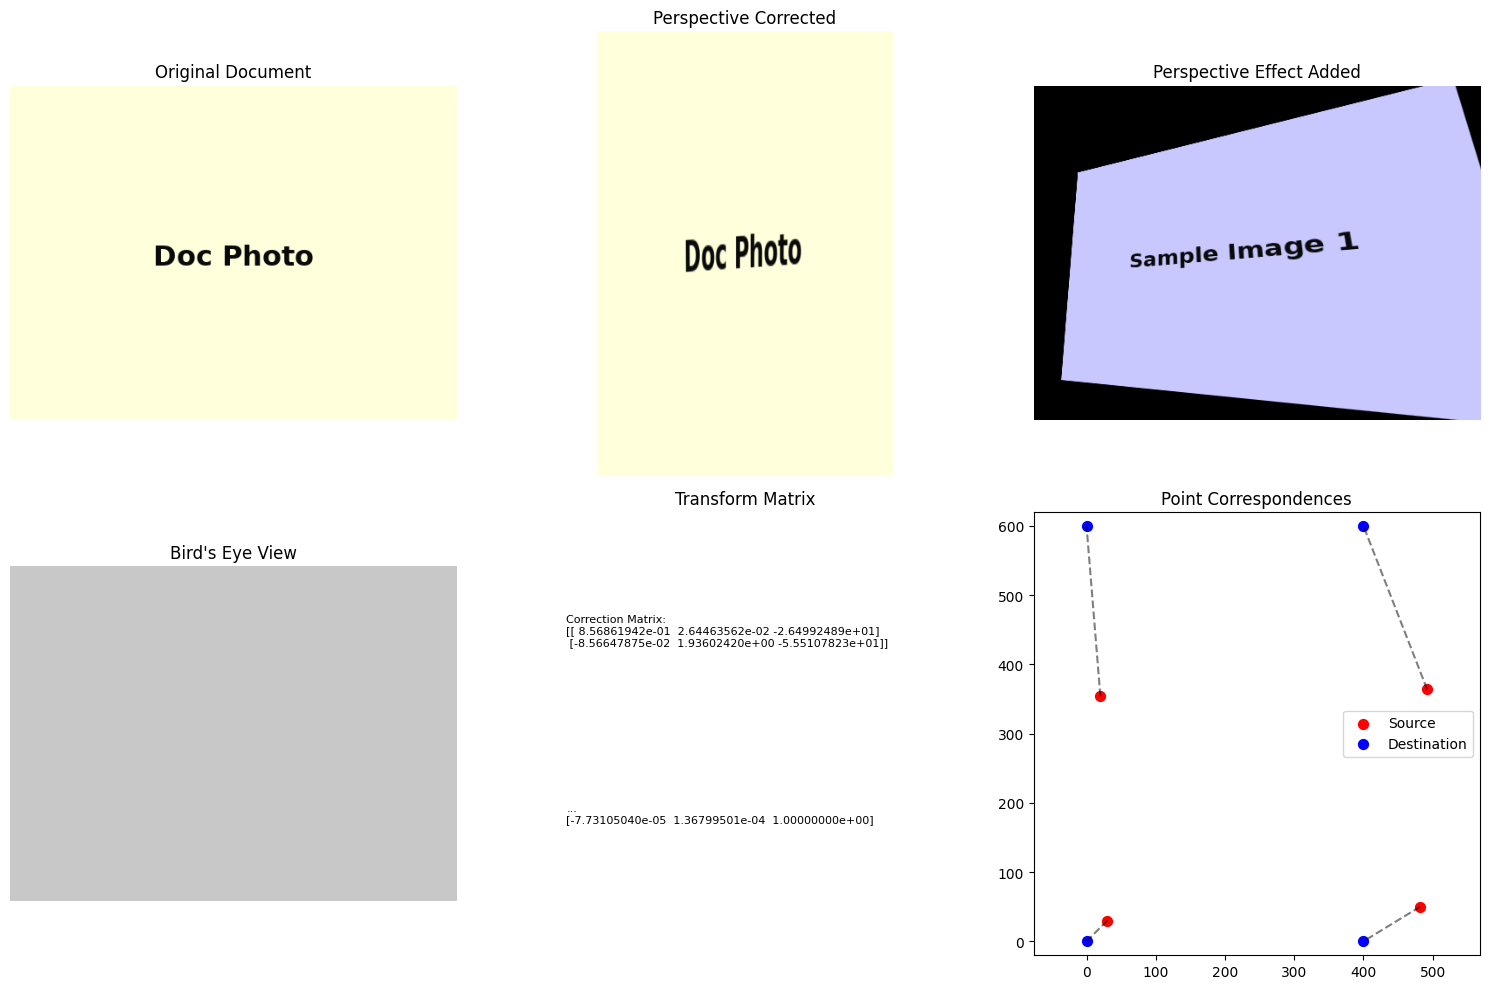

In [19]:
# Visual comparison of perspective transforms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(doc_rgb)
axes[0,0].set_title('Original Document')
axes[0,0].axis('off')

axes[0,1].imshow(perspective_corrected_rgb)
axes[0,1].set_title('Perspective Corrected')
axes[0,1].axis('off')

axes[0,2].imshow(perspective_effect_rgb)
axes[0,2].set_title('Perspective Effect Added')
axes[0,2].axis('off')

axes[1,0].imshow(birds_eye_rgb)
axes[1,0].set_title('Bird\'s Eye View')
axes[1,0].axis('off')

# Show matrices
axes[1,1].text(0.1, 0.7, f'Correction Matrix:\n{perspective_matrix[:2]}', fontsize=8)
axes[1,1].text(0.1, 0.3, f'...\n{perspective_matrix[2]}', fontsize=8)
axes[1,1].set_title('Transform Matrix')
axes[1,1].axis('off')

# Point correspondences visualization
axes[1,2].scatter([p[0] for p in pts1], [p[1] for p in pts1], c='red', s=50, label='Source')
axes[1,2].scatter([p[0] for p in pts2], [p[1] for p in pts2], c='blue', s=50, label='Destination')
for i in range(4):
    axes[1,2].plot([pts1[i][0], pts2[i][0]], [pts1[i][1], pts2[i][1]], 'k--', alpha=0.5)
axes[1,2].set_title('Point Correspondences')
axes[1,2].legend()
axes[1,2].axis('equal')

plt.tight_layout()
plt.show()

**Perspective Transform Tips:**
- Requires exactly 4 point pairs
- Use `cv2.getPerspectiveTransform()` and `cv2.warpPerspective()`
- Matrix is 3x3 (vs 2x3 for affine)
- Can handle converging lines and depth perception
- Point order matters (usually clockwise or counter-clockwise)
- Useful for document scanning, AR, and 3D scene understanding

## 5. Image Pyramids

**What are image pyramids?**
Image pyramids are multi-resolution representations of an image. They create a series of images at different scales, useful for tasks requiring analysis at multiple levels.

**Types:**
- **Gaussian Pyramid**: Successive blurring and subsampling
- **Laplacian Pyramid**: Used for image reconstruction and blending

**Applications:**
- Multi-scale feature detection
- Image blending and stitching
- Texture analysis
- Object detection at different scales

In [20]:
# Example 1: Gaussian Pyramid (downsampling)
def gaussian_pyramid(img, levels=4):
    """Create Gaussian pyramid by successive blurring and subsampling"""
    pyramid = [img]
    current = img.copy()
    
    for i in range(levels):
        # Blur the image
        blurred = cv2.GaussianBlur(current, (5, 5), 0)
        # Downsample (reduce size by half)
        downsampled = cv2.resize(blurred, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
        pyramid.append(downsampled)
        current = downsampled
    
    return pyramid

# Create Gaussian pyramid
gauss_pyramid = gaussian_pyramid(img, levels=3)

print(f"Pyramid levels: {[p.shape for p in gauss_pyramid]}")

Pyramid levels: [(384, 512, 3), (192, 256, 3), (96, 128, 3), (48, 64, 3)]


In [21]:
# Example 2: Laplacian Pyramid (for reconstruction)
def laplacian_pyramid(gauss_pyramid):
    """Create Laplacian pyramid from Gaussian pyramid"""
    levels = len(gauss_pyramid) - 1
    laplacian = []
    
    for i in range(levels):
        # Upsample current level
        upsampled = cv2.resize(gauss_pyramid[i+1], (gauss_pyramid[i].shape[1], gauss_pyramid[i].shape[0]), 
                              interpolation=cv2.INTER_LINEAR)
        # Subtract from previous level
        laplacian_level = cv2.subtract(gauss_pyramid[i], upsampled)
        laplacian.append(laplacian_level)
    
    # Last level is the smallest Gaussian
    laplacian.append(gauss_pyramid[-1])
    
    return laplacian

# Create Laplacian pyramid
laplacian_pyr = laplacian_pyramid(gauss_pyramid)

print(f"Laplacian pyramid levels: {[lp.shape for lp in laplacian_pyr]}")

Laplacian pyramid levels: [(384, 512, 3), (192, 256, 3), (96, 128, 3), (48, 64, 3)]


In [22]:
# Example 3: Image blending using pyramids
# Load two images for blending
img1 = cv2.imread('datasets/sample_images/sample1.png')
img2 = cv2.imread('datasets/sample_images/sample2.png')

if img1 is not None and img2 is not None:
    # Ensure same size
    img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    
    # Create masks for blending (simple horizontal split)
    mask1 = np.zeros_like(img1, dtype=np.float32)
    mask1[:, :img1.shape[1]//2] = 1  # Left half
    
    mask2 = np.zeros_like(img1, dtype=np.float32)
    mask2[:, img1.shape[1]//2:] = 1  # Right half
    
    # Simple blending (could be improved with pyramid blending)
    blended = cv2.addWeighted(img1.astype(np.float32), 0.5, img2_resized.astype(np.float32), 0.5, 0)
    blended_rgb = cv2.cvtColor(blended.astype(np.uint8), cv2.COLOR_BGR2RGB)
else:
    blended_rgb = img_rgb.copy()
    print("Images for blending not found")

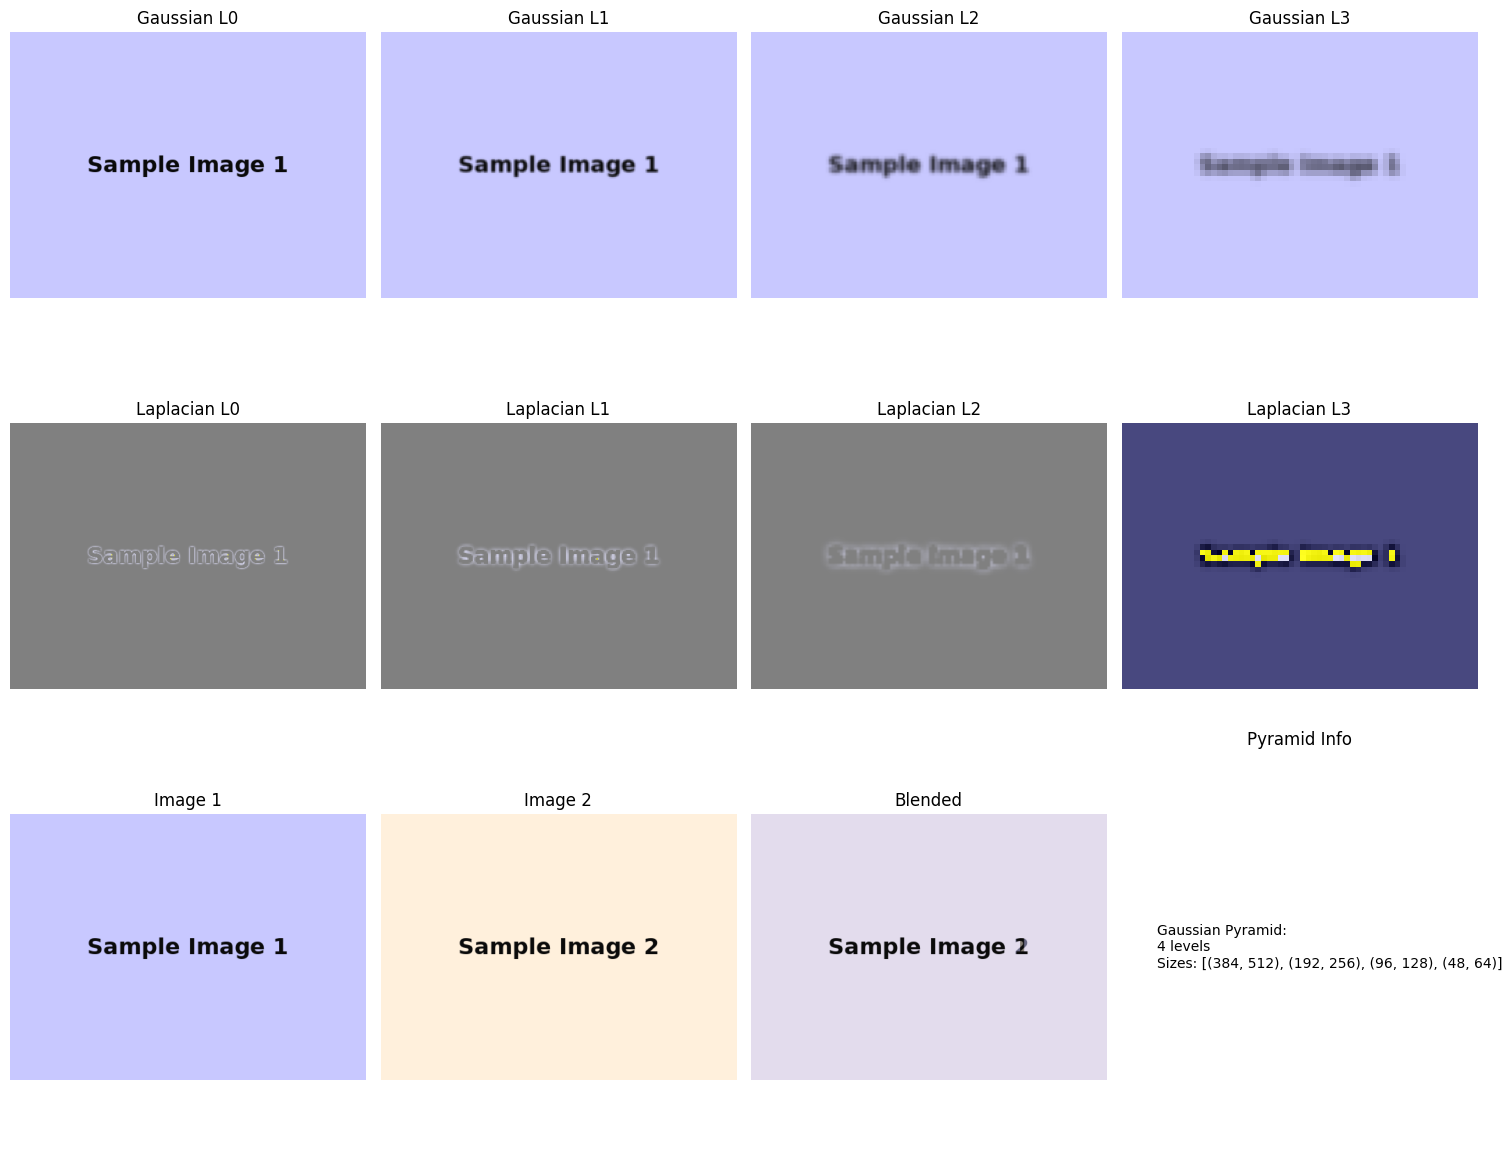

In [23]:
# Visual comparison of pyramids
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Gaussian Pyramid
for i, level in enumerate(gauss_pyramid):
    level_rgb = cv2.cvtColor(level, cv2.COLOR_BGR2RGB)
    axes[0, i].imshow(level_rgb)
    axes[0, i].set_title(f'Gaussian L{i}')
    axes[0, i].axis('off')

# Laplacian Pyramid
for i, level in enumerate(laplacian_pyr):
    # Convert to displayable format (add 128 to center around 0)
    level_display = cv2.cvtColor((level + 128).astype(np.uint8), cv2.COLOR_BGR2RGB)
    axes[1, i].imshow(level_display)
    axes[1, i].set_title(f'Laplacian L{i}')
    axes[1, i].axis('off')

# Original images and blend
axes[2, 0].imshow(img_rgb)
axes[2, 0].set_title('Image 1')
axes[2, 0].axis('off')

if 'img2_resized' in locals():
    axes[2, 1].imshow(cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB))
    axes[2, 1].set_title('Image 2')
    axes[2, 1].axis('off')

axes[2, 2].imshow(blended_rgb)
axes[2, 2].set_title('Blended')
axes[2, 2].axis('off')

# Pyramid info
axes[2, 3].text(0.1, 0.5, f'Gaussian Pyramid:\n{len(gauss_pyramid)} levels\nSizes: {[p.shape[:2] for p in gauss_pyramid]}', 
               transform=axes[2,3].transAxes, fontsize=10, verticalalignment='center')
axes[2, 3].set_title('Pyramid Info')
axes[2, 3].axis('off')

plt.tight_layout()
plt.show()

**Image Pyramids Tips:**
- Useful for multi-scale analysis
- Gaussian pyramid: blur + downsample
- Laplacian pyramid: difference between levels
- Essential for seamless image blending
- Used in many computer vision algorithms
- Consider memory usage with large images

## Summary and Best Practices

We've covered the major geometric transformations in image processing:

1. **Resizing**: Change image dimensions with proper interpolation
2. **Rotation**: Turn images around center or arbitrary points
3. **Affine Transforms**: Preserve parallelism (translation, rotation, scaling, shearing)
4. **Perspective Transforms**: Handle 3D geometry and converging lines
5. **Image Pyramids**: Multi-resolution representations

**General Tips:**
- Always consider interpolation quality
- Check coordinate systems (OpenCV vs. mathematical)
- Handle boundary conditions properly
- Consider performance vs. quality trade-offs
- Test transforms with known inputs first

**Performance Considerations:**
- Perspective transforms are most computationally expensive
- Use appropriate data types
- Consider GPU acceleration for real-time applications

Practice these transforms with your own images and explore combining multiple transformations!